## Import bibliotek.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Wczytanie zbiorów.

In [2]:
tr = pd.read_parquet('dane/tr.parquet') # dane sprzedażowe - TR
va = pd.read_parquet('dane/va.parquet') # dane sprzedażowe - VA

## 2. Analiza jednowymiarowa.

### 2.1. Ćwiczenie 1.
* Wczytaj poprawnie zbiór `adult.csv` z katalogu "dane". Brakujące wartości zostały oznaczone w nim poprzez "?".

In [3]:
place = pd.read_csv('dane/adult.csv', na_values='?') # płace

* Sprawdź, czy zbiór zawiera jakiekolwiek brakujące informacje. Jeśli tak, to dla zmiennej kategorycznych, uzupełnij je wartością "NA".

In [4]:
place.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [5]:
place.fillna('NA', inplace=True)

* Sprawdź liczności w zmiennej "workclass". Wszystkie klasy, które stanowią mniej niż 1% zbioru umieść w jednej kategorii o nazwie "other".

In [6]:
place.workclass.value_counts(normalize=True)

# Klasy stanowiące mniej niż 1% zbioru: Without-pay, Never-worked -

Private             0.697030
Self-emp-not-inc    0.078038
Local-gov           0.064279
NA                  0.056386
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: workclass, dtype: float64

In [7]:
place['workclass'].replace({
    'Without-pay': 'Other',
    'Never-worked': 'Other'
}, inplace=True)

In [8]:
place.workclass.value_counts(normalize=True)

Private             0.697030
Self-emp-not-inc    0.078038
Local-gov           0.064279
NA                  0.056386
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Other               0.000645
Name: workclass, dtype: float64

* Korzystając ze zmiennej "education" odpowiedz na pytanie, jakie jest najpopularniejsze wykoształcenie w zbiorze.

In [9]:
place.education.value_counts() 
# Najpopularniejsze wykształcenie w zbiorze S-grad

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

* Czy w zbiorze mamy więcej osób po rozwodzie, czy bez nigdy niezamężnych/nieżonatych?

In [10]:
place['marital.status'].value_counts()
# rozwodnicy stanowią mniejszą grupę

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64

* Czy więcej obserwacji zarabia powyżej, czy poniżej 50 tys. rocznie?

In [11]:
place.income.value_counts()
# ponad 3 razy więcej osób zarabia poniżej $50k

<=50K    24720
>50K      7841
Name: income, dtype: int64

### 2.2. Ćwiczenie 2.
* Z katalogu "dane" wczytaj zbiór `data_science_salaries.csv`.

In [12]:
zarobki_ds = pd.read_csv('dane/data_science_salaries.csv') # płace w Data Science

* Załóżmy, że będziemy starali się wyjaśnić co wpływa na poziom zarobków w branży Data Science. Sprawdź na wykresie gęstości rozkład zmiennej celu "salary_in_usd".

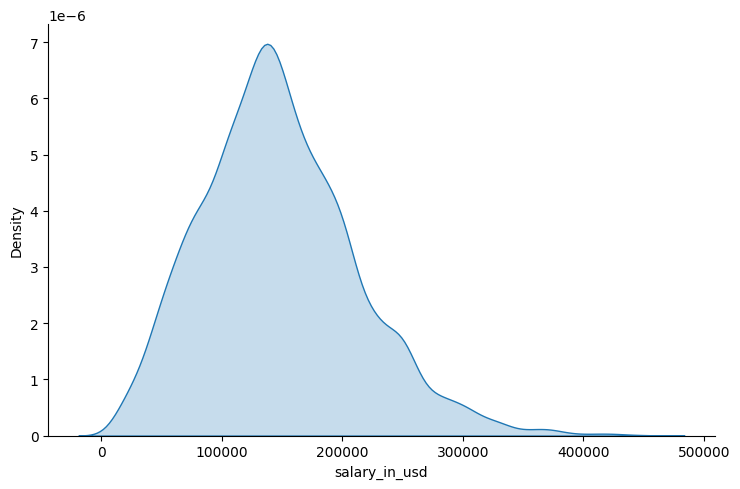

In [13]:
sns.displot(zarobki_ds.salary_in_usd, kind='kde', fill=True, aspect=1.5)
plt.show()

In [14]:
zarobki_ds.shape

(5929, 11)

* Czy zmienna celu wymaga logarytmowania ze względu na skośność? A może lepiej usunąć część obserwacji, które zarabiają powyżej 300000 dolarów rocznie?
    * Sprawdź oba podejścia na wykresie gęstości (logarytmowanie i usuwanie wartości odstajacych).
    * Ile obserwacji stracimy, jeśli zdecydujemy się odrzucić obserwacje zarabiające powyżej 300000 dolarów?
    * Jaką część zbioru będą stanowiły te obserwacje?

In [15]:
zarobki_ds[zarobki_ds.salary_in_usd>300000].shape
# 106 osób zarabia powyżej 300000 dolarów.

(106, 11)

In [16]:
106/zarobki_ds.shape[0]
# usuniemy ok. 1.8% zbioru

0.017878225670433463

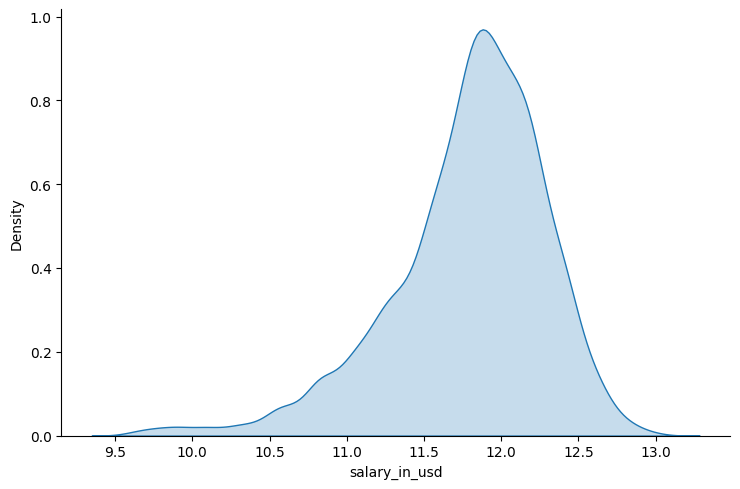

In [18]:
sns.displot(np.log(zarobki_ds.salary_in_usd), kind='kde', fill=True, aspect=1.5)
plt.show()
# uzyskaliśmy skośnośc, ale w drugą stronę

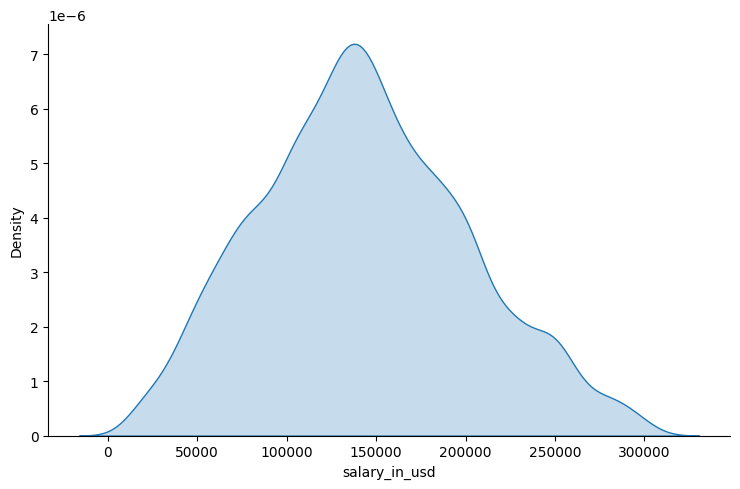

In [19]:
sns.displot(zarobki_ds.query('salary_in_usd<300000').salary_in_usd, kind='kde', fill=True, aspect=1.5)
plt.show()
# w tej wersji rozkład wygląda znacznie lepiej

* Ogranicz zbiór tylko do obserwacji, które zarabiają poniżej 300000 dolarów rocznie.

In [20]:
zarobki_ds = zarobki_ds[zarobki_ds.salary_in_usd < 300000]

### 2.3. Ćwiczenie 3.
* Użyj zbioru uczącego, dotyczącego danych sprzeażowych "Produktu A" (wczytane do zmiennej `tr`), wykonaj poniższe polecenia i odpowiedz na pytania.

* Podejrzyj zbiór z użyciem metody `.head()`, by przypomnieć sobie jego strukturę.

In [21]:
tr.head()

,data_sprzedazy,data_odciecia,id_drogerii,sprzedaz,cena_ropy,miasto,wojewodztwo,typ_drogerii,srednia_sprzedaz_0_2d,srednia_sprzedaz_0_6d,srednia_sprzedaz_0_13d,srednia_cena_ropy_0_6d,srednia_cena_ropy_0_29d,dzien_tygodnia,weekend,swieto,miesiac,rok_dzialalnosci,sprzedaz_minus_1t
36,2018-02-07,2018-01-31,1,1,96.44,Warszawa,Mazowieckie,D,2.000000,2.428571,2.214286,96.050000,94.531667,Środa,False,False,Luty,1,97.98
37,2018-02-08,2018-02-01,1,1,95.84,Warszawa,Mazowieckie,D,1.000000,2.428571,2.142857,96.378571,94.682000,Czwartek,False,False,Luty,1,97.65
38,2018-02-09,2018-02-02,1,2,95.71,Warszawa,Mazowieckie,D,1.333333,2.142857,2.357143,96.708571,94.826000,Piątek,False,False,Luty,1,97.46
39,2018-02-10,2018-02-03,1,4,95.71,Warszawa,Mazowieckie,D,1.000000,1.571429,2.000000,97.038571,94.975667,Sobota,True,False,Luty,1,97.46
40,2018-02-11,2018-02-04,1,1,95.71,Warszawa,Mazowieckie,D,1.000000,1.285714,1.785714,97.368571,95.120333,Niedziela,True,False,Luty,1,97.46


* Na wykresie gęstości podejrzyj rozkład zmiennej celu - "sprzedaz". Jakiej statystyki możemy użyć do podsumowania tych danych (wyznaczyć miarę centralną - średnia vs mediana)? Uzasadnij odpowiedź.

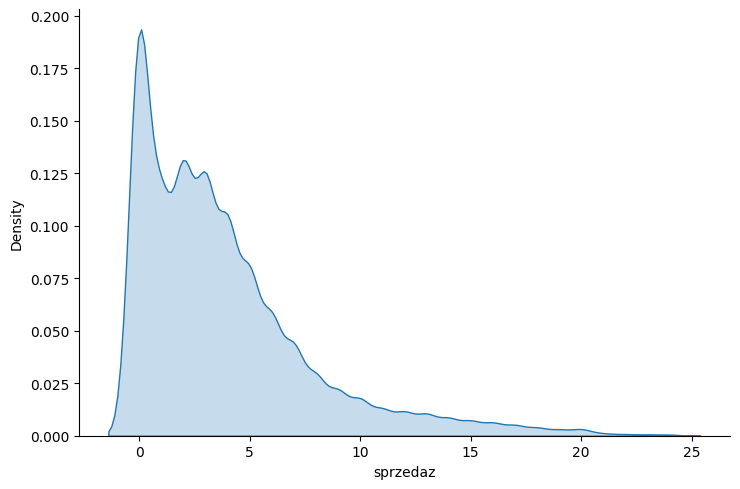

In [22]:
sns.displot(tr.sprzedaz, kind='kde', fill=True, aspect=1.5)
plt.show()

# zdecydowanie mediana, gdyż rozkład jest prawostronnie skośny

* Na powyższym wykresie powinieneś dostrzec bimodalność. Jak myslisz, z czego ona wynika? Skorzystaj z metody `.value_counts()`, by sprawdzić, które wartości występowały najczęściej.

In [23]:
# Było bardzo dużo dni, kiedy sprzedaż wynosiła 0, stąd pierwsza górka.

* Sprawdź rozkład zmiennej "srednia_cena_ropy_0_29d". Czy jest w niej coś nietypowego? Opisz jej rozkład.

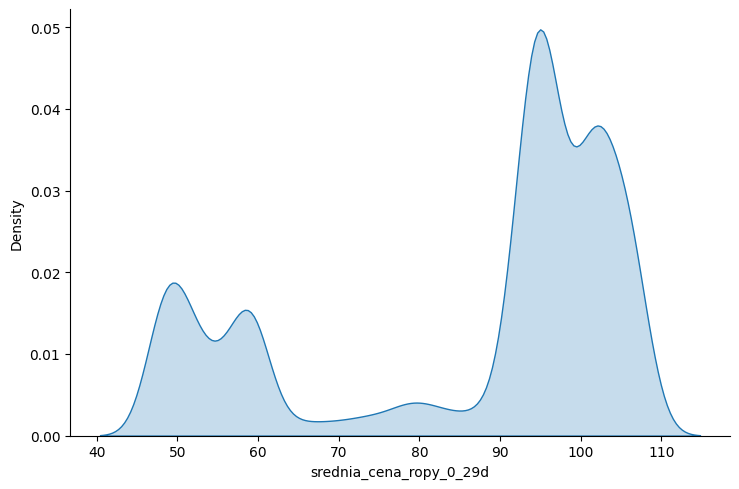

In [24]:
sns.displot(tr.srednia_cena_ropy_0_29d, kind='kde', fill=True, aspect=1.5)
plt.show()
# Jest to rozkład wielomodalny. Widać podział na dwa duże zagęszczenia cen: jedno w okolicy 55$, a drugie ok. 100$.

* Korzystając z grupowania, sprawdź, które miasto sprzedało najwięcej produktów. Czy przewaga nad drugim miastem jest znaczna?

In [25]:
tr.groupby('miasto').sprzedaz.sum().sort_values(ascending=False)
# Warszawa

miasto
Warszawa        98815
Włocławek       17152
Kraków           9351
Opole            7432
Kielce           7171
Lublin           6031
Olsztyn          5067
Gdańsk           4685
Gdynia           4574
Radom            4248
Łódź             4128
Wrocław          3926
Poznań           3818
Katowice         3270
Bydgoszcz        2664
Toruń            2613
Szczecin         1794
Grudziądz        1708
Zielona Góra     1478
Gliwice          1215
Rzeszów          1014
Białystok           0
Name: sprzedaz, dtype: int64

* Korzystając z metody `describe()` opisz, jak wyglądała przeciętna sprzedaż w Warszawskich drogeriach. Następnie zrób to samo dla trójmiasta. Zwróć uwagę na takie statystyki jak: mediana, 25%, 75%. Czy Warszawskie sklepy rzeczywiście sprzedają znacznie lepiej?

In [26]:
tr.query('miasto=="Warszawa"').sprzedaz.describe()

count    16560.000000
mean         5.967089
std          5.302909
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         24.000000
Name: sprzedaz, dtype: float64

In [27]:
tr[tr.miasto.isin(['Gdańsk', 'Sopot', 'Gdynia'])].sprzedaz.describe()
# Sprzedaż jest powrównywalna. Wygląda na to, że w Warszawie jest więcej drogerii niż w trójmieście.

count    1840.000000
mean        5.032065
std         2.653766
min         0.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: sprzedaz, dtype: float64

## 3. Analiza dwuwymiarowa.

### 3.1. Ćwiczenie 4.
* Spośród poniższych zmiennych zmiennych, sprawdź, które z nich będą najbardziej perspektywistyczne podczas modelowania (najmocniej skorelowane ze zmienną celu).

In [28]:
zmienne = ['sprzedaz', 'srednia_sprzedaz_0_2d', 'srednia_sprzedaz_0_6d',
           'srednia_sprzedaz_0_13d', 'srednia_cena_ropy_0_6d',
           'srednia_cena_ropy_0_29d', 'rok_dzialalnosci', 'sprzedaz_minus_1t']

In [29]:
tr[zmienne].corr()['sprzedaz']

sprzedaz                   1.000000
srednia_sprzedaz_0_2d      0.735593
srednia_sprzedaz_0_6d      0.766119
srednia_sprzedaz_0_13d     0.783053
srednia_cena_ropy_0_6d    -0.048006
srednia_cena_ropy_0_29d   -0.047540
rok_dzialalnosci           0.061205
sprzedaz_minus_1t         -0.048134
Name: sprzedaz, dtype: float64

* Spośród zmiennych sprawdź, które są ze sobą mocno skorelowane (współczynnik korelacji > 0.5) i spośród nich wybierz reprezentantów, którzy są najmocniej skorelowani ze zmienną celu. 

In [30]:
tr[zmienne].corr()

,sprzedaz,srednia_sprzedaz_0_2d,srednia_sprzedaz_0_6d,srednia_sprzedaz_0_13d,srednia_cena_ropy_0_6d,srednia_cena_ropy_0_29d,rok_dzialalnosci,sprzedaz_minus_1t
sprzedaz,1.000000,0.735593,0.766119,0.783053,-0.048006,-0.047540,0.061205,-0.048134
srednia_sprzedaz_0_2d,0.735593,1.000000,0.946984,0.920610,-0.056323,-0.053763,0.065783,-0.056521
srednia_sprzedaz_0_6d,0.766119,0.946984,1.000000,0.975683,-0.058116,-0.055611,0.069094,-0.058069
srednia_sprzedaz_0_13d,0.783053,0.920610,0.975683,1.000000,-0.057923,-0.055877,0.070890,-0.057952
srednia_cena_ropy_0_6d,-0.048006,-0.056323,-0.058116,-0.057923,1.000000,0.991462,-0.795705,0.997669
srednia_cena_ropy_0_29d,-0.047540,-0.053763,-0.055611,-0.055877,0.991462,1.000000,-0.800862,0.986274
rok_dzialalnosci,0.061205,0.065783,0.069094,0.070890,-0.795705,-0.800862,1.000000,-0.793860
sprzedaz_minus_1t,-0.048134,-0.056521,-0.058069,-0.057952,0.997669,0.986274,-0.793860,1.000000


In [31]:
# Najmocniej skorelowana ze zmienną celu: srednia_sprzedaz_0_13d - 0.783053
    # wspóskorelowane: srednia_sprzedaz_0_2d, srednia_sprzedaz_0_6d
    
# Zmienna do sprawdzenia: srednia_cena_ropy_0_6d - mocniej skorelowana ze zmienną celu niż srednia_cena_ropy_0_29d
# rok_dzialalnosci - z każdym rokiem sprzedaż nieco wzrasta.

### 3.2. Ćwiczenie 5.

In [32]:
zarobki_ds = pd.read_csv('dane/data_science_salaries.csv') # płace w Data Science
zarobki_ds = zarobki_ds[zarobki_ds.salary_in_usd < 300000]

* Czy duże firmy płacą pracownikom więcej niż średnie?

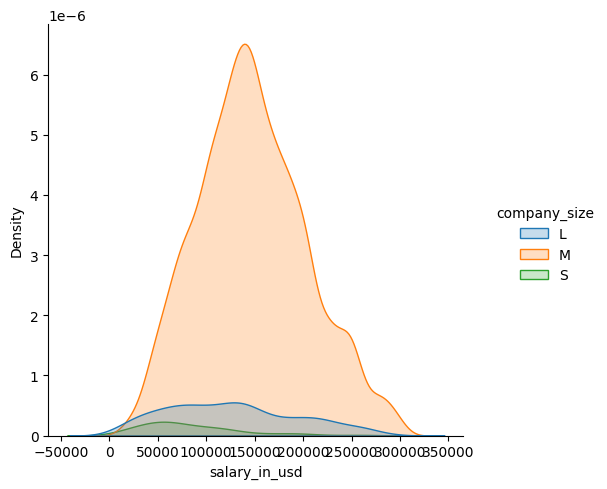

In [33]:
sns.displot(data=zarobki_ds,
            x='salary_in_usd',
            hue='company_size', 
            kind='kde',
            fill=True
)
plt.show()

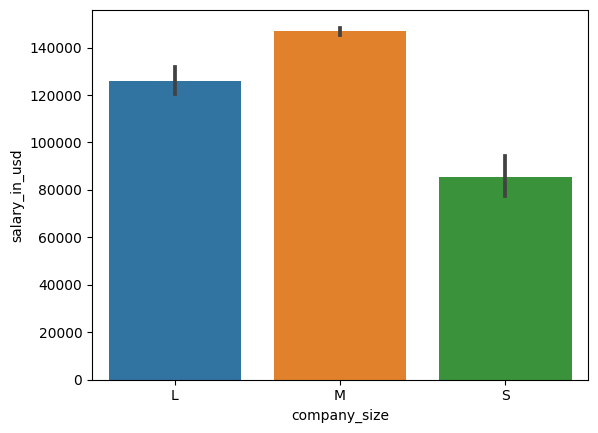

In [34]:
sns.barplot(data=zarobki_ds,
            x='company_size',
            y='salary_in_usd',
            estimator='mean', 
            errorbar=('ci', 95) 
)
plt.show()
# najwięcej (przeciętnie) płacą średnie firmy, tj. "M"

* Sprawdź jak w firmach o różnych rozmiarach ("company_size"), poziomy pracy zdalnej ("remote_ratio") wpływa na zarobki ("salary_in_usd"). Czy można mówić tu o interakcji?

In [35]:
zarobki_ds.groupby(['company_size', 'remote_ratio']).salary_in_usd.mean()

# we wszystkich firmach trend jest zbliżony:
    # osoby pracujące "on-site" zarabiają nawięcej
    # osoby pracujące hybrydowo zarabiają najmniej
    # osoby pracujące 100% zdalnie znajdują się pomiędzy obiema grupami

company_size  remote_ratio
L             0               155529.514768
              50               83082.898305
              100             117826.534188
M             0               149724.775833
              50               70345.063830
              100             144674.537073
S             0               100538.800000
              50               78173.200000
              100              84000.086957
Name: salary_in_usd, dtype: float64

### 3.3. Ćwiczenie 6.
Korzystając z poniższego zbioru odpowiedz na niżej zamieszczone pytania.

In [36]:
place = pd.read_csv('dane/adult.csv', na_values='?') # płace

* Czym charakteryzują się osoby dobrze zarabiające?

In [37]:
place.income.value_counts(normalize=True)
# 24% zarabia powyżej 50K

<=50K    0.75919
>50K     0.24081
Name: income, dtype: float64

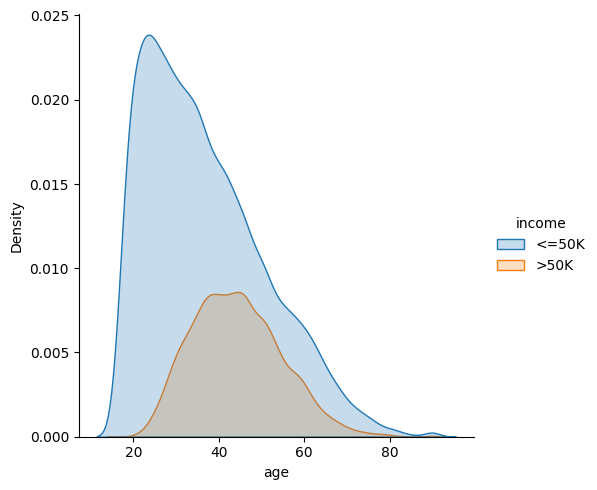

In [38]:
sns.displot(data=place,
            x='age',
            kind='kde',
            fill=True,
            hue='income')
plt.show()
# dobrze zarabiający posiadają już pewien staż - nie są to młodziaki (studia?_

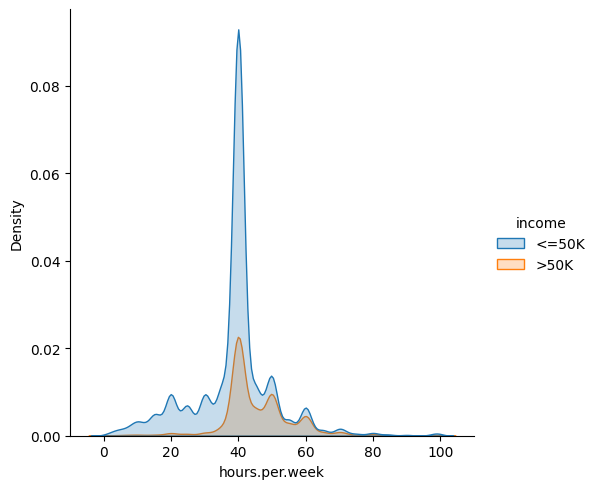

In [39]:
sns.displot(data=place,
            x='hours.per.week',
            kind='kde',
            fill=True,
            hue='income')
plt.show()

In [40]:
pd.crosstab(place.workclass, place.income, normalize='index')*100
# Znakomicie zarabiający:
#    - Self-emp-inc 55 vs 45
#    - Federal-gov  39 vs 61

income,<=50K,>50K
workclass,,
Federal-gov,61.354167,38.645833
Local-gov,70.520784,29.479216
Never-worked,100.000000,0.000000
Private,78.132711,21.867289
Self-emp-inc,44.265233,55.734767
Self-emp-not-inc,71.507281,28.492719
State-gov,72.804314,27.195686
Without-pay,100.000000,0.000000


In [41]:
(pd.crosstab(place.education, place.income, normalize='index')*100) \
    .sort_values('>50K', ascending=False)
# Znakomicie zarabiający:
#   - Doctorate
#   - Prof-school
#   - Masters
#   Warto się uczyć.

income,<=50K,>50K
education,,
Doctorate,25.907990,74.092010
Prof-school,26.562500,73.437500
Masters,44.341265,55.658735
Bachelors,58.524743,41.475257
Assoc-voc,73.878437,26.121563
Assoc-acdm,75.164011,24.835989
Some-college,80.976546,19.023454
HS-grad,84.049138,15.950862
12th,92.378753,7.621247


In [42]:
(pd.crosstab(place.race, place.income, normalize='index')*100) \
    .sort_values('>50K', ascending=False)
# Azjaci zarabiają najwięcej

income,<=50K,>50K
race,,
Asian-Pac-Islander,73.435996,26.564004
White,74.414006,25.585994
Black,87.612036,12.387964
Amer-Indian-Eskimo,88.424437,11.575563
Other,90.774908,9.225092


In [43]:
(pd.crosstab(place['marital.status'], place.income, normalize='index')*100) \
    .sort_values('>50K', ascending=False)
# żonaci i zamężne zarabiają zdecydowanie najwięcej

income,<=50K,>50K
marital.status,,
Married-civ-spouse,55.315171,44.684829
Married-AF-spouse,56.521739,43.478261
Divorced,89.579113,10.420887
Widowed,91.440081,8.559919
Married-spouse-absent,91.866029,8.133971
Separated,93.560976,6.439024
Never-married,95.403913,4.596087
